In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from PIL import Image
%matplotlib inline
from glob import glob

In [30]:
female=glob('./DATA/crop/female_crop/*.png')
male=glob('./DATA/crop/male_crop/*.png')

In [31]:
len(female),len(male)

(128, 349)

In [32]:
path=male+female


In [33]:
#getting size of image
def getsize(path):
    img=Image.open(path)
    return img.size[0]

In [34]:
#create dataframe
df=pd.DataFrame(data=path,columns=['path'])
df.head()

,path
0,./DATA/crop/male_crop\male_10.png
1,./DATA/crop/male_crop\male_100.png
2,./DATA/crop/male_crop\male_1001.png
3,./DATA/crop/male_crop\male_1004.png
4,./DATA/crop/male_crop\male_1006.png


In [35]:
df.shape

(477, 1)

In [36]:
df['size']=df['path'].apply(getsize)

In [37]:
df.head()

,path,size
0,./DATA/crop/male_crop\male_10.png,273
1,./DATA/crop/male_crop\male_100.png,81
2,./DATA/crop/male_crop\male_1001.png,122
3,./DATA/crop/male_crop\male_1004.png,54
4,./DATA/crop/male_crop\male_1006.png,182


## EDA

In [38]:
df.describe()

,size
count,477.000000
mean,160.064990
std,75.083329
min,54.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


<AxesSubplot:>

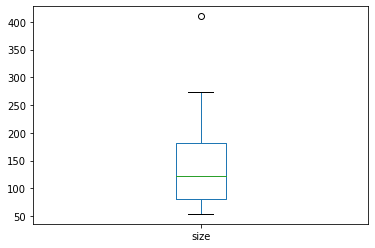

In [39]:
df['size'].plot(kind='box')

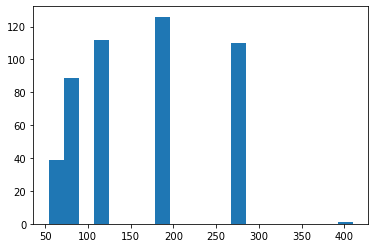

In [40]:
plt.hist(df['size'],bins=20)
plt.show()

## So, from analysis i will resize all the image to 100 *  100 form and remove image with size less or equal 54

In [41]:
df_new=df[df['size']>60]

In [42]:
df_new

,path,size
0,./DATA/crop/male_crop\male_10.png,273
1,./DATA/crop/male_crop\male_100.png,81
2,./DATA/crop/male_crop\male_1001.png,122
4,./DATA/crop/male_crop\male_1006.png,182
5,./DATA/crop/male_crop\male_1007.png,182
...,...,...
472,./DATA/crop/female_crop\female_92.png,81
473,./DATA/crop/female_crop\female_94.png,273
474,./DATA/crop/female_crop\female_96.png,273
475,./DATA/crop/female_crop\female_98.png,182


In [43]:
def gender(string):
    try:
        return string.split("_")[0].split("/")[-1]
    except:
        return None

In [44]:
df_new['gender']=df_new['path'].apply(gender)

c:\users\shekh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_new

,path,size,gender
0,./DATA/crop/male_crop\male_10.png,273,male
1,./DATA/crop/male_crop\male_100.png,81,male
2,./DATA/crop/male_crop\male_1001.png,122,male
4,./DATA/crop/male_crop\male_1006.png,182,male
5,./DATA/crop/male_crop\male_1007.png,182,male
...,...,...,...
472,./DATA/crop/female_crop\female_92.png,81,female
473,./DATA/crop/female_crop\female_94.png,273,female
474,./DATA/crop/female_crop\female_96.png,273,female
475,./DATA/crop/female_crop\female_98.png,182,female


male      0.726027
female    0.273973
Name: gender, dtype: float64


<AxesSubplot:>

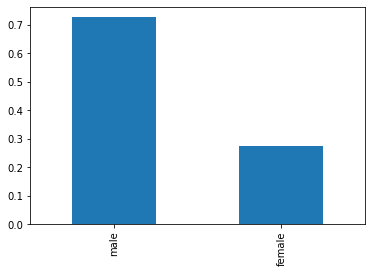

In [46]:
print(df_new['gender'].value_counts(normalize=True))
df_new['gender'].value_counts(normalize=True).plot(kind='bar')

1. 73% male are there and rest are female
2. All the Image size is greater than or equal to 81

Conclusion resizing all the image in the df_new to 100 x 100 

In [47]:
df_new['size'].min()

81

# RESIZE IMAGE

In [48]:
def resize_img(path_to_resize):
    try:
        # step -1 : read image 
        img=cv.imread(path_to_resize)
        # step - 2: convert into grayscale
        gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
        size=gray.shape[0]
        if size>=100:#large
            gray_re=cv.resize(gray,(100,100),cv.INTER_AREA)
        else:#small
            gray_re=cv.resize(gray,(100,100),cv.INTER_CUBIC)
        #flatten image (1x10,100)
        return gray_re.flatten()
    except:
        return None


In [49]:
df_new['structured_data']=df_new['path'].apply(resize_img)

c:\users\shekh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_new

,path,size,gender,structured_data
0,./DATA/crop/male_crop\male_10.png,273,male,"[68, 69, 66, 66, 69, 69, 67, 68, 66, 23, 33, 2..."
1,./DATA/crop/male_crop\male_100.png,81,male,"[10, 10, 7, 10, 18, 2, 1, 6, 8, 5, 4, 8, 14, 2..."
2,./DATA/crop/male_crop\male_1001.png,122,male,"[129, 127, 125, 123, 117, 107, 95, 91, 95, 98,..."
4,./DATA/crop/male_crop\male_1006.png,182,male,"[51, 55, 62, 57, 53, 62, 85, 108, 124, 131, 13..."
5,./DATA/crop/male_crop\male_1007.png,182,male,"[0, 8, 1, 26, 65, 50, 50, 45, 82, 112, 125, 14..."
...,...,...,...,...
472,./DATA/crop/female_crop\female_92.png,81,female,"[45, 41, 38, 38, 40, 43, 49, 58, 70, 82, 92, 9..."
473,./DATA/crop/female_crop\female_94.png,273,female,"[188, 180, 184, 188, 173, 179, 192, 178, 216, ..."
474,./DATA/crop/female_crop\female_96.png,273,female,"[1, 1, 1, 2, 3, 3, 2, 2, 3, 4, 5, 5, 4, 4, 4, ..."
475,./DATA/crop/female_crop\female_98.png,182,female,"[185, 184, 184, 182, 182, 182, 182, 182, 173, ..."


In [51]:
#copy and expand their columns
df1=df_new['structured_data'].apply(pd.Series)
df1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,68,69,66,66,69,69,67,68,66,23,...,33,30,40,29,32,34,48,41,38,34
1,10,10,7,10,18,2,1,6,8,5,...,80,105,117,106,82,59,46,33,19,5
2,129,127,125,123,117,107,95,91,95,98,...,60,69,69,58,60,80,76,89,123,139
4,51,55,62,57,53,62,85,108,124,131,...,164,163,158,163,168,171,173,176,181,187
5,0,8,1,26,65,50,50,45,82,112,...,192,191,191,192,193,191,189,190,191,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,45,41,38,38,40,43,49,58,70,82,...,23,22,21,22,23,25,25,26,26,26
473,188,180,184,188,173,179,192,178,216,219,...,109,111,115,116,122,116,119,120,117,111
474,1,1,1,2,3,3,2,2,3,4,...,122,114,106,119,125,129,130,132,93,104
475,185,184,184,182,182,182,182,182,173,178,...,75,15,3,6,4,3,4,6,9,7


In [52]:
df2=pd.concat([df_new['gender'],df1],axis=1)

In [53]:
df2

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,male,68,69,66,66,69,69,67,68,66,...,33,30,40,29,32,34,48,41,38,34
1,male,10,10,7,10,18,2,1,6,8,...,80,105,117,106,82,59,46,33,19,5
2,male,129,127,125,123,117,107,95,91,95,...,60,69,69,58,60,80,76,89,123,139
4,male,51,55,62,57,53,62,85,108,124,...,164,163,158,163,168,171,173,176,181,187
5,male,0,8,1,26,65,50,50,45,82,...,192,191,191,192,193,191,189,190,191,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,female,45,41,38,38,40,43,49,58,70,...,23,22,21,22,23,25,25,26,26,26
473,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
474,female,1,1,1,2,3,3,2,2,3,...,122,114,106,119,125,129,130,132,93,104
475,female,185,184,184,182,182,182,182,182,173,...,75,15,3,6,4,3,4,6,9,7


Text(0.5, 1.0, 'male')

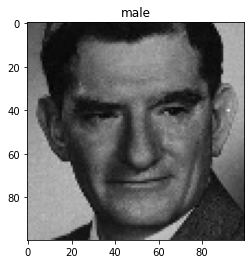

In [54]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title(df2.loc[0]['gender'])

In [55]:
import pickle
pickle.dump(df2,open('./DATA/dataframe_images_100_100.pickle','wb'))